In [1]:
import pandas as pd
import numpy as np
from make_df import create_df, make_inputs
from hardEM_0 import HEM_fit, HEM_predictions 
from naive import naive_fit, get_true_labels
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt





In [17]:
#covariates = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

covariates = ['x1', 'x2', 'x3']

#dist = [[3.7, 0.7], [5.1, 2.1], [4.75, 0.9], [10.5, 2.1], [8.75, 3.9], [5.7, 0.9], [3.75, 0.5], [9.75, 3.11], [2.11, 0.9], [7.7, 2.9]]

dist = [[0, 1], [0, 1], [0, 1]]

cols = ['censoring_indicator', 'cure_label']

In [3]:
test_model_weights = np.array([-0.31462666, -0.43649021, -0.46716136,  0.2622172 ]) #np.random.uniform(-0.5,0.5,4)    #[0.5, -1.5, -1.3, 0.95]

In [4]:
foo = create_df(covariates, dist, 200, test_model_weights, 0.5)

In [5]:
foo.head()

,x1,x2,x3,cure_label,int,censoring_indicator
0,-0.581205,-0.055150,-0.183293,1.0,1,0
1,-0.773737,0.335992,0.280802,1.0,1,0
2,2.042512,1.229725,0.521166,1.0,1,1
3,-1.089770,-0.262968,-0.756843,0.0,1,0
4,-1.054018,-0.359361,0.902020,0.0,1,0


In [6]:
loo =foo[foo.censoring_indicator==0]

In [7]:
len(loo.index)

139

In [8]:
len(loo[loo.cure_label==0].index)/len(loo.index)

0.460431654676259

In [9]:
censored_inputs = make_inputs(foo, 0, cols)

noncensored_inputs = make_inputs(foo, 1, cols)

In [10]:
fit = naive_fit(censored_inputs, noncensored_inputs, 'fifty_fifty')
    


In [11]:
y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])

In [12]:
from sklearn.metrics import accuracy_score
y_pred = fit['pred']

accuracy_score(y_true, y_pred)



0.705

In [13]:
y_scores = fit['prob']

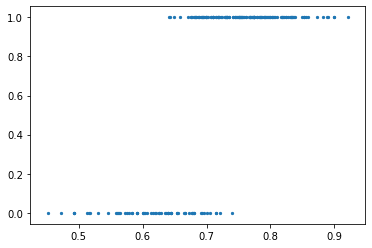

In [14]:
compi = pd.DataFrame({'true': y_true, 'pred': y_pred, 'score': y_scores})

plt.scatter(compi['score'], compi['true'], s=5)

In [15]:
#y_scores = fit['prob_not_cured']
roc_auc_score(y_true, y_scores)

0.9608226102941176

In [16]:
total_inputs = np.concatenate((censored_inputs, noncensored_inputs), axis=0)

new_df = pd.DataFrame.from_records(total_inputs)

In [15]:
new_df['prob'] = y_scores

new_df['cure_labels'] = y_true

In [16]:
cured = new_df[new_df.cure_labels==0]

not_cured = new_df[new_df.cure_labels==1]

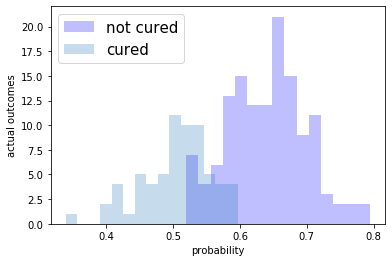

In [17]:
plt.xlabel('probability')
plt.ylabel('actual outcomes')

plt.hist(not_cured['prob'], bins=15, label='not cured', color='blue', alpha=0.25)
plt.hist(cured['prob'], bins=15, label='cured', alpha=0.25)
plt.legend(fontsize=15)

plt.show()

In [18]:
fit_n = naive_fit(censored_inputs, noncensored_inputs, 'censoring_rate')


In [19]:
y_true_n = get_true_labels(foo, ['censoring_indicator', 'cure_label'])

In [20]:
y_pred_n = fit['pred']

accuracy_score(y_true_n, y_pred_n)

0.81

In [21]:
y_scores_n = fit_n['prob']

In [22]:
roc_auc_score(y_true_n, y_scores_n)

1.0

In [14]:
x = np.array([[1,0.2,0.3], [1,0.6,0.7]])

x.shape

(2, 3)

In [24]:
fit0 = HEM_fit(censored_inputs, noncensored_inputs, 0.5, 1000, 'use_random')

In [25]:
weights = fit0['model_weights']

In [27]:
weights

array([-2.59696043e+00, -1.51651909e-02, -1.17341549e-02,  1.55177863e-03])

In [28]:
fit0['minvalue']

0.25143404356392435

In [29]:
fit0['maxvalue']

0.6921320701572322

In [30]:
predictions = HEM_predictions(weights, foo, covariates)

In [31]:

y_pred0 = predictions['pred']
y_true0 = foo['cure_label']

y_scores0 = predictions['prob']


accuracy_score(y_true0, y_pred0)

0.715

In [32]:
comp = pd.DataFrame({'true': y_true0, 'prob': y_scores0})



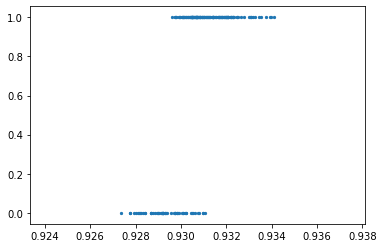

In [33]:
plt.scatter(comp['prob'], comp['true'], s=5)

In [34]:
foo['prob0'] = y_scores0

In [35]:
not_cured0 = foo[foo.cure_label==1]

cured0 = foo[foo.cure_label==0]

#not_cured0

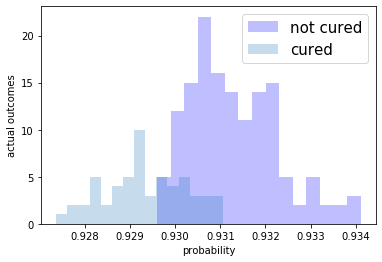

In [36]:
plt.xlabel('probability')
plt.ylabel('actual outcomes')

plt.hist(not_cured0['prob0'], bins=15, label='not cured', color='blue', alpha=0.25)
plt.hist(cured0['prob0'], bins=15, label='cured', alpha=0.25)
plt.legend(fontsize=15)

plt.show()

In [37]:
from sklearn.metrics import roc_auc_score

y_scores0 = predictions['prob']
roc_auc_score(y_true0, y_scores0)

0.9321555637345111

In [19]:
foo.columns

Index(['x1', 'x2', 'x3', 'cure_label', 'int', 'censoring_indicator', 'prob0'], dtype='object')

In [34]:
extra0 = pd.DataFrame([[0.1,0.1,0.1,0,1,0]],columns = ['x1', 'x2', 'x3', 'cure_label', 'int', 'censoring_indicator'])

In [35]:
extra1 = pd.DataFrame([[0.1,0.1,0.1,1,1,1]],columns = ['x1', 'x2', 'x3', 'cure_label', 'int', 'censoring_indicator'])

In [36]:
extra0

,x1,x2,x3,cure_label,int,censoring_indicator
0,0.1,0.1,0.1,0,1,0


In [37]:
extra1

,x1,x2,x3,cure_label,int,censoring_indicator
0,0.1,0.1,0.1,1,1,1


In [38]:
extra = pd.concat([extra0, extra1])

In [2]:
probs = np.arange(0.1,1.1,0.1)

probs

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [32]:
r_weights = np.random.uniform(-0.5,0.5,(10,4))
scores = []
covariates = ['x1', 'x2', 'x3']
dist = [[0, 1], [0, 1], [0, 1]]
cols = ['censoring_indicator', 'cure_label']

for test_model_weights in r_weights:
    
    foo = create_df(covariates, dist, 150, test_model_weights, 0.5)
    
    foo = pd.concat([foo, extra])
    
    censored_inputs = make_inputs(foo, 0, cols)

    noncensored_inputs = make_inputs(foo, 1, cols)
    
    
    #fit = HEM_fit(censored_inputs, noncensored_inputs, 0.5, 1000, 'use_random')
    
    #weights = fit['model_weights']
    
    #predictions = HEM_predictions(weights, foo, covariates)
    
    #y_pred = predictions['pred']
    
    #y_true = foo['cure_label']
    
    #y_scores = predictions['prob']
    
    fit = naive_fit(censored_inputs, noncensored_inputs, 'use_HardEM')    
    
    y_pred = fit['pred']
    
    y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
    y_scores = fit['prob']
    
    hard_acc = accuracy_score(y_true, y_pred)
    
    hard_auc = roc_auc_score(y_true, y_scores)
    
    fit_naive = naive_fit(censored_inputs, noncensored_inputs, 'fifty_fifty')
    
    y_pred_naive = fit_naive['pred']
    
    y_true_naive = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
    y_scores_naive = fit_naive['prob']
    
    naive_acc = accuracy_score(y_true_naive, y_pred_naive)
    
    naive_auc = roc_auc_score(y_true_naive, y_scores_naive)
    

    scores.append([hard_auc, naive_auc, hard_acc, naive_acc ])
    
new_df = pd.DataFrame(columns=['HardEM_auc', 'NaiveEM_auc', 'HardEM_acc', 'NaiveEM_acc'], data=scores)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [79]:
new_df

,HardEM_auc,NaiveEM_auc,HardEM_acc,NaiveEM_acc
0,0.853431,0.912843,0.782895,0.730263
1,0.941783,0.939336,0.894737,0.631579
2,0.978365,0.821250,0.736842,0.657895
3,0.932134,0.969381,0.809211,0.901316
4,0.675599,0.808061,0.881579,0.888158
5,0.986867,0.832483,0.894737,0.453947
6,0.959746,0.861042,0.782895,0.822368
7,0.981838,0.886600,0.855263,0.309211
8,0.965783,0.911729,0.881579,0.723684
9,0.956197,0.966575,0.907895,0.467105


In [80]:
len(new_df[new_df['HardEM_auc']-new_df['NaiveEM_auc']>0].index)

14

In [ ]:
'use_HardEM'

In [40]:
r_weights = np.random.uniform(-0.5,0.5,(10,4))
scores = []
covariates = ['x1', 'x2', 'x3']
dist = [[0, 1], [0, 1], [0, 1]]
cols = ['censoring_indicator', 'cure_label']

for test_model_weights in r_weights: 
    
    for p in probs:
    
        foo = create_df(covariates, dist, 150, test_model_weights, p)
    
        foo = pd.concat([foo, extra])
    
        censored_inputs = make_inputs(foo, 0, cols)

        noncensored_inputs = make_inputs(foo, 1, cols)
    
    
    #fit = HEM_fit(censored_inputs, noncensored_inputs, 0.5, 1000, 'use_random')
    
    #weights = fit['model_weights']
    
    #predictions = HEM_predictions(weights, foo, covariates)
    
    #y_pred = predictions['pred']
    
    #y_true = foo['cure_label']
    
    #y_scores = predictions['prob']
    
        fit = naive_fit(censored_inputs, noncensored_inputs, 'use_HardEM')    
    
        y_pred = fit['pred']
    
        y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
        y_scores = fit['prob']
    
        hard_acc = accuracy_score(y_true, y_pred)
    
        hard_auc = roc_auc_score(y_true, y_scores)
    
        fit_naive = naive_fit(censored_inputs, noncensored_inputs, 'fifty_fifty')
    
        y_pred_naive = fit_naive['pred']
    
        y_true_naive = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
        y_scores_naive = fit_naive['prob']
    
        naive_acc = accuracy_score(y_true_naive, y_pred_naive)
    
        naive_auc = roc_auc_score(y_true_naive, y_scores_naive)
    

        scores.append([hard_auc, naive_auc, hard_acc, naive_acc ])
    
new_df = pd.DataFrame(columns=['HardEM_auc', 'NaiveEM_auc', 'HardEM_acc', 'NaiveEM_acc'], data=scores)

In [41]:
new_df

,HardEM_auc,NaiveEM_auc,HardEM_acc,NaiveEM_acc
0,0.991635,0.972019,0.927632,0.500000
1,0.994697,0.998348,0.967105,0.657895
2,0.991859,0.945641,0.907895,0.651316
3,0.998512,0.981005,0.848684,0.605263
4,0.923519,0.982051,0.828947,0.480263
...,...,...,...,...
95,0.659994,0.777506,0.730263,0.828947
96,0.505040,0.481423,0.789474,0.802632
97,0.575974,0.806140,0.315789,0.809211
98,0.688743,0.928716,0.269737,0.888158


In [42]:
len(new_df[new_df['HardEM_auc']-new_df['NaiveEM_auc']>0].index)

62

In [43]:
len(new_df[new_df['HardEM_acc']-new_df['NaiveEM_acc']>0].index)

70

In [44]:
how_auc = new_df[new_df['HardEM_auc']-new_df['NaiveEM_auc']>0]

In [47]:
(how_auc['HardEM_auc']-how_auc['NaiveEM_auc']).mean()

0.1151441516857973

In [48]:
(how_auc['HardEM_acc']-how_auc['NaiveEM_acc']).mean()

0.14526740237691008

In [18]:
import pandas as pd


mel = pd.read_csv('melanoma.csv')

In [19]:
mel.head()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
0,1,10,3,1,76,1972,6.76,1
1,2,30,3,1,56,1968,0.65,0
2,3,35,2,1,41,1977,1.34,0
3,4,99,3,0,71,1968,2.90,0
4,5,185,1,1,52,1965,12.08,1


In [20]:
status_df = mel.status

In [21]:
#Creating a censoring indicator: 1 means not censored, 2 means censored, and 3 means censored. 

status_df = status_df.replace(3, 0) # means censored

In [22]:
status_df = status_df.replace(2, 0) # means censored

In [23]:
mel['status'] = status_df #This is r censoring column

In [30]:
status_df.head()

0    0
1    0
2    0
3    0
4    1
Name: status, dtype: int64

In [24]:
mel.head()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
0,1,10,0,1,76,1972,6.76,1
1,2,30,0,1,56,1968,0.65,0
2,3,35,0,1,41,1977,1.34,0
3,4,99,0,0,71,1968,2.90,0
4,5,185,1,1,52,1965,12.08,1


In [25]:
predictors_and_status = ['status', 'time', 'sex', 'age', 'thickness', 'ulcer']

predictors = ['time', 'sex', 'age', 'thickness', 'ulcer']



In [26]:
mel_predictors = mel[predictors]

In [27]:
mel_predictors_s = 1/mel_predictors.std()*(mel_predictors-mel_predictors.mean()) #standardize

In [28]:
foo_mel = mel_predictors_s #shorten name

In [29]:
foo_mel['status'] = mel['status'] #add back the censoring indicator column

In [103]:
columns = ['status'] # to be fed into algo

In [104]:
censored_inputs_mel = make_inputs(foo_mel, 0, columns) #extract censored

noncensored_inputs_mel = make_inputs(foo_mel, 1, columns) #extract noncensored

In [105]:
censored_inputs_mel

array([[ 1.00000000e+00, -1.90970066e+00,  1.25982401e+00,
         1.41176781e+00,  1.29759545e+00,  1.12762792e+00],
       [ 1.00000000e+00, -1.89187631e+00,  1.25982401e+00,
         2.12130914e-01, -7.66989461e-01, -8.82491412e-01],
       [ 1.00000000e+00, -1.88742023e+00,  1.25982401e+00,
        -6.87596756e-01, -5.33836665e-01, -8.82491412e-01],
       [ 1.00000000e+00, -1.83038231e+00, -7.89889655e-01,
         1.11185858e+00, -6.70860291e-03, -8.82491412e-01],
       [ 1.00000000e+00, -1.71185040e+00, -7.89889655e-01,
         4.52058293e-01,  1.01420230e-01,  1.12762792e+00],
       [ 1.00000000e+00, -1.60223066e+00, -7.89889655e-01,
         6.91985672e-01, -9.32561737e-01,  1.12762792e+00],
       [ 1.00000000e+00, -1.47924265e+00,  1.25982401e+00,
         1.17184043e+00,  3.25743055e+00,  1.12762792e+00],
       [ 1.00000000e+00, -1.18246726e+00, -7.89889655e-01,
         2.01158625e+00,  1.89906208e+00,  1.12762792e+00],
       [ 1.00000000e+00, -6.46845595e-01,  1.259

In [106]:
fit = HEM_fit(censored_inputs_mel, noncensored_inputs_mel, 0.5, 1000, 'use_clustering')

In [107]:
weights = fit['model_weights']

In [108]:
weights

array([-0.05578208,  0.14007225, -0.08140815, -0.08917484, -0.16671815,
       -0.28243868])

In [109]:
predictions = HEM_predictions(weights, foo_mel, predictors)

In [114]:
(predictions['prob']).mean()

0.5120144019313181